<a href="https://colab.research.google.com/github/HkHino/12DaysOfChristmas/blob/master/ResNetCatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import itertools

In [ ]:
!rm -r machine-learning
!git clone https://github.com/joneikholmkea/machine-learning

rm: cannot remove 'machine-learning': No such file or directory
Cloning into 'machine-learning'...
remote: Enumerating objects: 80873, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 80873 (delta 49), reused 80 (delta 30), pack-reused 80740
Receiving objects: 100% (80873/80873), 303.35 MiB | 24.29 MiB/s, done.
Resolving deltas: 100% (58990/58990), done.
Updating files: 100% (94954/94954), done.


In [ ]:
image_size = [100, 100]
epochs = 1
batch_size = 128

In [ ]:
trainingFiles = "/content/machine-learning/img/cat-dog/training_set"
testFiles     = "/content/machine-learning/img/cat-dog/test_set"

In [ ]:
image_files = glob(trainingFiles + '/*/*.jp*g')

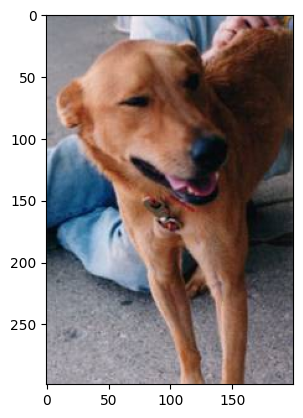

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))
folders = glob(trainingFiles + '/*') #giver can og dog folders

In [ ]:
resNet = ResNet50(input_shape=image_size + [3], weights='imagenet',include_top= False)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in resNet.layers:
  layer.trainable = False

In [ ]:
layers = Flatten()(resNet.output)
layers = Dense(30, activation='relu')(layers)
layers = Dropout(0,5)(layers)
layers = Dense(len(folders), activation='softmax')(layers)

In [ ]:
model = Model(inputs=resNet.input, outputs= layers)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
    loss      = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics   = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

training_set = train_datagen.flow_from_directory(
    trainingFiles,
    target_size = image_size,
    shuffle = True,
    batch_size = batch_size,
    class_mode = 'sparse'   #Memory efficiency
)

test_set = train_datagen.flow_from_directory(
    testFiles,
    target_size = image_size,
    shuffle = False,
    batch_size = batch_size,
    class_mode = 'sparse'   #Memory efficiency
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model.fit(
    training_set,
    validation_data=test_set,
    epochs = epochs,
    steps_per_epoch=62,
    validation_steps =15
)

62/62 [==============================] - 499s 8s/step - loss: 0.7249 - accuracy: 0.8195 - val_loss: 0.3034 - val_accuracy: 0.8609
